# WGCNA (Weighted gene co-expression network analysis) analysis
Weighted gene co-expression network analysis (WGCNA) is a systems biology approach to characterize gene association patterns between different samples and can be used to identify highly synergistic gene sets and identify candidate biomarker genes or therapeutic targets based on the endogeneity of the gene sets and the association between the gene sets and the phenotype.

Paper: [WGCNA: an R package for weighted correlation network analysis](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-9-559#Sec21)

Code: Reproduce by Python. Raw is http://www.genetics.ucla.edu/labs/horvath/CoexpressionNetwork/Rpackages/WGCNA

Here, you will be briefly guided through the basics of how to use Pyomic to perform wgcna anlysis. Once you are set

In [1]:
import Pyomic
Pyomic.utils.pyomic_plot_set()

## Load the data
The analysis is based on the in-built WGCNA tutorial data.

In [2]:
import pandas as pd
data=Pyomic.utils.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/Starlitnightly/Pyomic/master/sample/LiverFemale3600.csv',
                           index_col=0)
data.head()

,F2_2,F2_3,F2_14,F2_15,F2_19,F2_20,F2_23,F2_24,F2_26,F2_37,...,F2_324,F2_325,F2_326,F2_327,F2_328,F2_329,F2_330,F2_332,F2_355,F2_357
substanceBXH,,,,,,,,,,,,,,,,,,,,,
MMT00000044,-0.01810,0.0642,0.000064,-0.0580,0.04830,-0.151974,-0.00129,-0.23600,-0.0307,-0.02610,...,0.047700,-0.0488,0.0168,-0.0309,0.02740,-0.031,0.0660,-0.0199,-0.0146,0.065000
MMT00000046,-0.07730,-0.0297,0.112000,-0.0589,0.04430,-0.093800,0.09340,0.02690,-0.1330,0.07570,...,-0.049200,-0.0350,-0.0738,-0.1730,-0.07380,-0.201,-0.0820,-0.0939,0.0192,-0.049900
MMT00000051,-0.02260,0.0617,-0.129000,0.0871,-0.11500,-0.065026,0.00249,-0.10200,0.1420,-0.10200,...,0.000612,0.1210,0.0996,0.1090,0.02730,0.120,-0.0629,-0.0395,0.1090,0.000253
MMT00000076,-0.00924,-0.1450,0.028700,-0.0439,0.00425,-0.236100,-0.06900,0.01440,0.0363,-0.01820,...,-0.270000,0.0803,0.0424,0.1610,0.05120,0.241,0.3890,0.0251,-0.0348,0.114000
MMT00000080,-0.04870,0.0582,-0.048300,-0.0371,0.02510,0.085043,0.04450,0.00167,-0.0680,0.00567,...,0.113000,-0.0859,-0.1340,0.0639,0.00731,0.124,-0.0212,0.0870,0.0512,0.024300


## Correlation matrix calculate

We can calculate the direct correlation matrix by each gene

In [3]:
gene_wgcna=Pyomic.bulk.pyWGCNA(data,save_path='result')
gene_wgcna.calculate_correlation_direct(method='pearson',save=False)

...correlation coefficient matrix is being calculated


In pyWGCNA module, we need to trans the direct correlation matrix to indirect correlation matrix to calculate the soft threshold, Soft thresholds can help us convert the original correlation network into a scale-free network

In [4]:
gene_wgcna.calculate_correlation_indirect(save=False)

...indirect correlation matrix is being calculated


...soft_threshold is being calculated
...appropriate soft_thresholds: 5


,beta,r2,meank
1,1,0.001434,866.510550
2,2,0.223522,373.883499
3,3,0.434748,217.589775
4,4,0.655388,153.295645
5,5,0.889141,123.977608
6,6,0.916398,111.535289
7,7,0.897792,109.220186
8,8,0.852653,114.496535
9,9,0.859802,126.781878
10,10,0.838656,146.668526


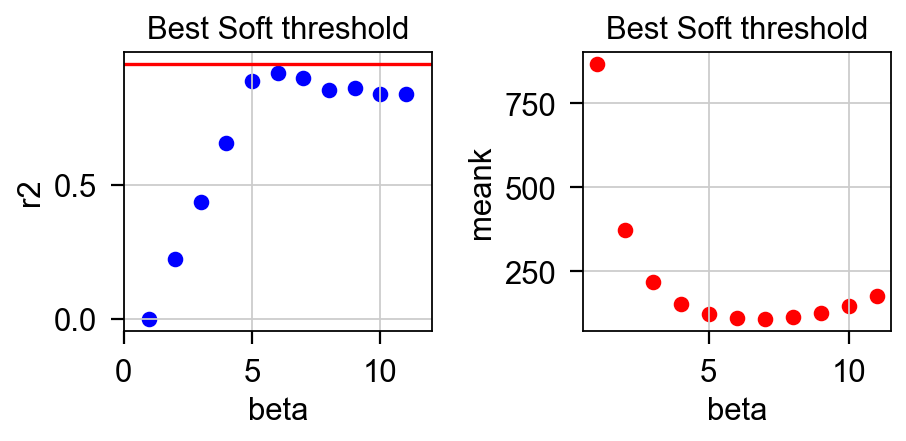

In [5]:
gene_wgcna.calculate_soft_threshold(save=False)

The left vertical coordinate is the evaluation metric r2 for a scale-free network. the closer r2 is to 1, the closer the network is to a scale-free network, usually requiring >0.8 or 0.9. the right vertical coordinate is the average connectivity, which decreases as β increases. Combining the two graphs, the β value is usually chosen when r^2 first reaches 0.8 or 0.9 or more. With the β value one can convert the correlation matrix into an adjacency matrix according to Eq.

Then we can construct the Topological Overlap Matrix

In [6]:
gene_wgcna.calculate_corr_matrix()

## Building a network of co-expressions

We use the dynamicTree to build the co-expressions module

...distance have being calculated
...geneTree have being calculated
...dynamicMods have being calculated
..cutHeight not given, setting it to 604.917454749358  ===>  99% of the (truncated) height range in dendro.
..done.
...total: 15


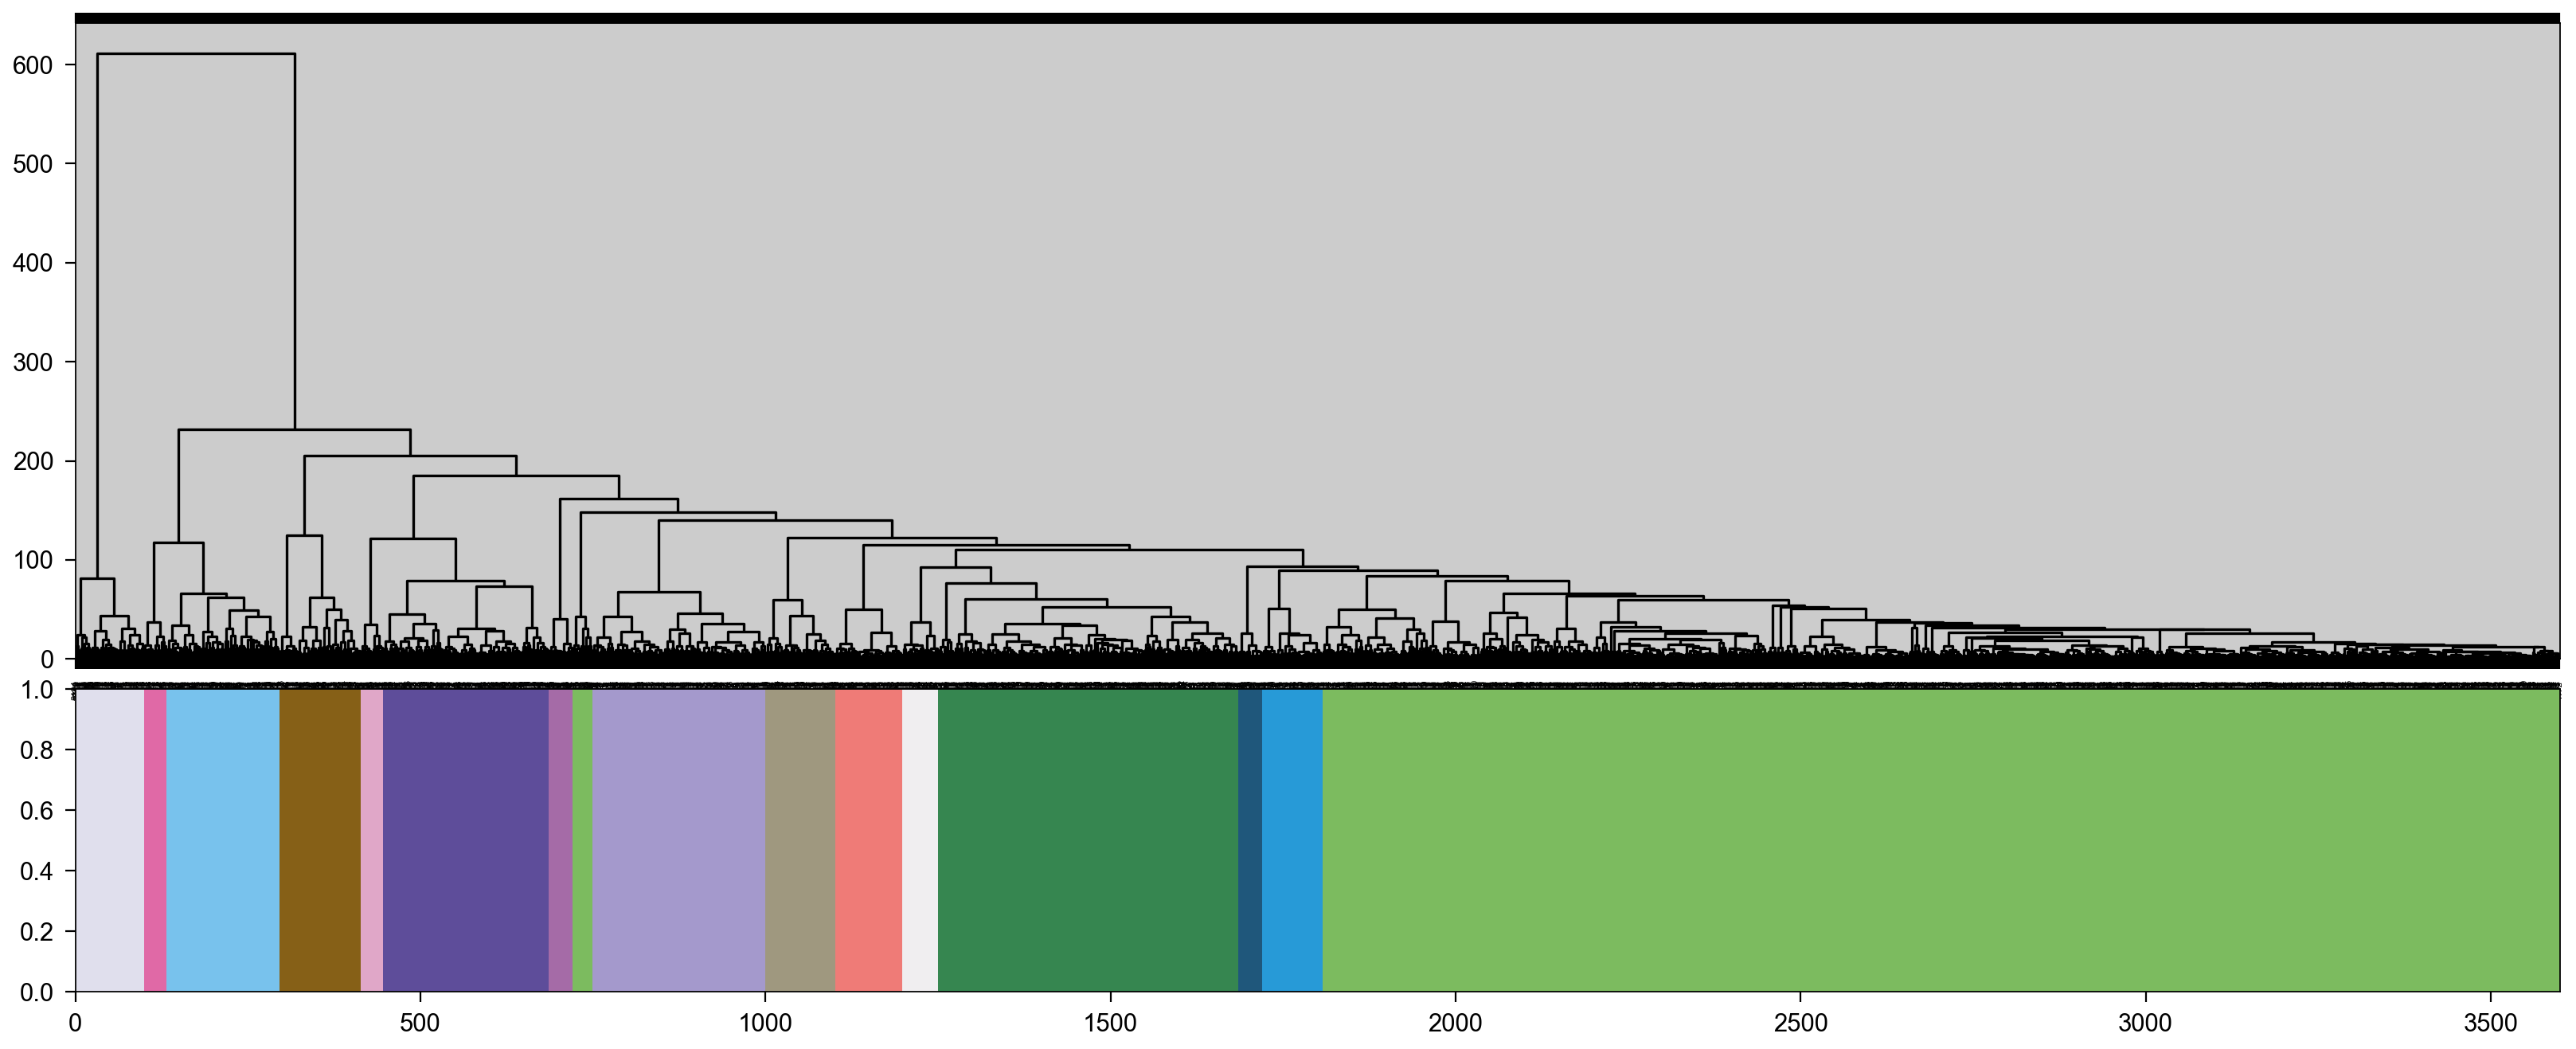

In [7]:
gene_wgcna.calculate_distance()
gene_wgcna.calculate_geneTree()
gene_wgcna.calculate_dynamicMods()
module=gene_wgcna.calculate_gene_module()

Here, we successfully calculated each gene's module. There are 15 module, and their color were present in the figures.

In [8]:
module.head()

,ivl,module,name,color
0,2124,8,MMT00049213,#E0DFED
1,1879,8,MMT00043907,#E0DFED
2,2720,8,MMT00063091,#E0DFED
3,2702,8,MMT00062691,#E0DFED
4,879,8,MMT00020288,#E0DFED


## Sub co-expression module

Sometimes we are interested in a gene, or a module of a pathway, and we need to extract the sub-modules of the gene for analysis and mapping. For example, we have selected two modules, 6 and 12, as sub-modules for analysis

In [9]:
gene_wgcna.get_sub_module([6,12]).shape

(151, 4)

We found a total of 151 genes for 6 and 12. Next, we used the scale-free network constructed earlier, with the threshold set to 0.95, to construct a gene correlation network graph for modules 6 and 12

In [10]:
gene_wgcna.get_sub_network([6,12],correlation_threshold=0.95)

pyWGCNA provides a simple visualisation function `plot_sub_network` to visualise the gene-free network of our interest.

(<Figure size 640x640 with 1 Axes>, <AxesSubplot: >)

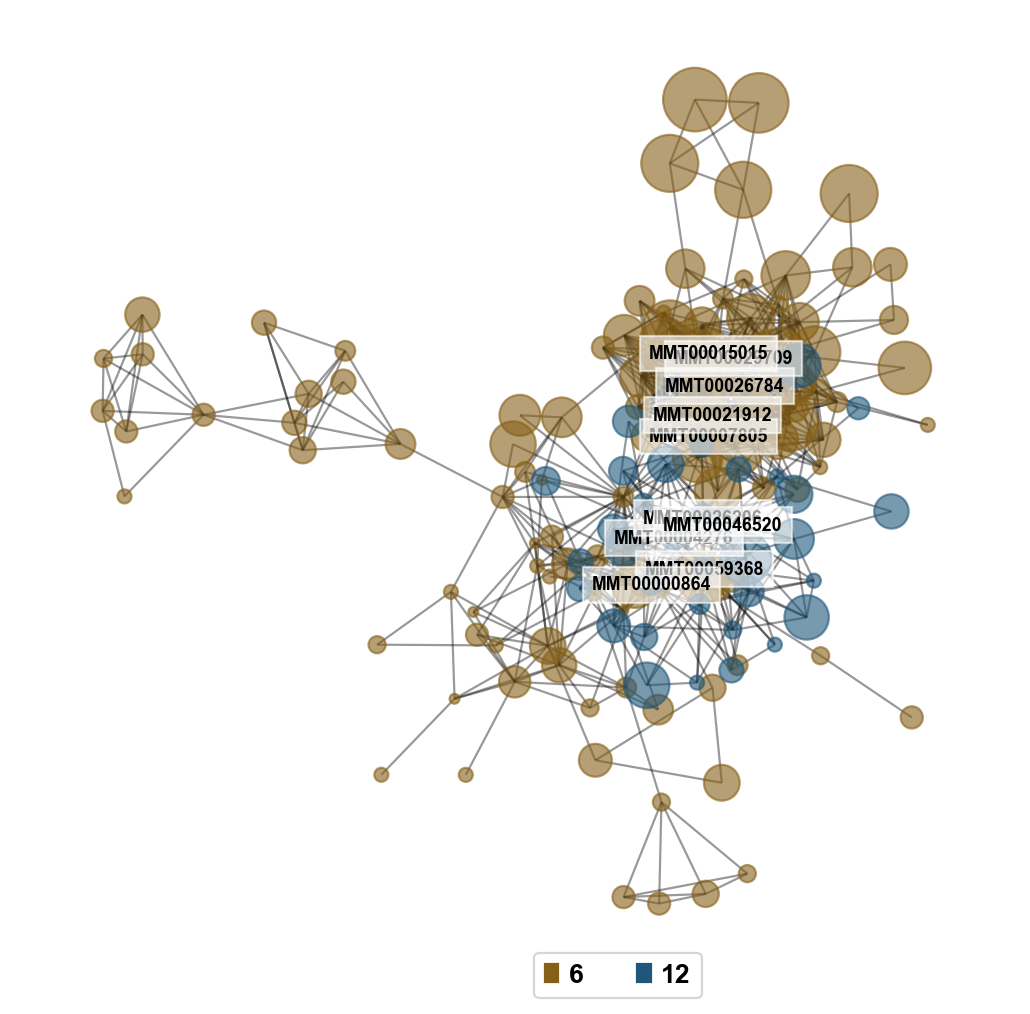

In [11]:
gene_wgcna.plot_sub_network([6,12],pos_type='kamada_kawai',pos_scale=3,pos_dim=2,
                         figsize=(8,8),node_size=20,label_fontsize=8,
                        label_bbox={"ec": "white", "fc": "white", "alpha": 0.6})

## Module and trait associations

In addition to being able to select modules based on target genes, we can also select modules based on specific sample traits. We can calculate the correlation between traits and modules for each sample, and thus find modules with the traits we are interested in.

We read the trait matrix firstly from github. The trait matrix shape must be `index` is sample and `columns` is trait. The sample name must be consistent with the sample name of our original data earlier.

In [12]:
meta=Pyomic.utils.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/Starlitnightly/Pyomic/master/sample/character.csv',
                          index_col=0)
meta.head()

,weight_g,length_cm,ab_fat,other_fat
Mice,,,,
F2_2,38.0,10.5,3.81,2.78
F2_3,33.5,10.8,1.70,2.05
F2_14,33.9,10.0,1.29,1.67
F2_15,44.3,10.3,3.62,3.34
F2_19,32.9,9.7,2.08,1.85


Then we use `analysis_meta_correlation` to calculate the correlation between module and the trait

In [13]:
cor_matrix=gene_wgcna.analysis_meta_correlation(meta)

...PCA analysis have being done
...co-analysis have being done


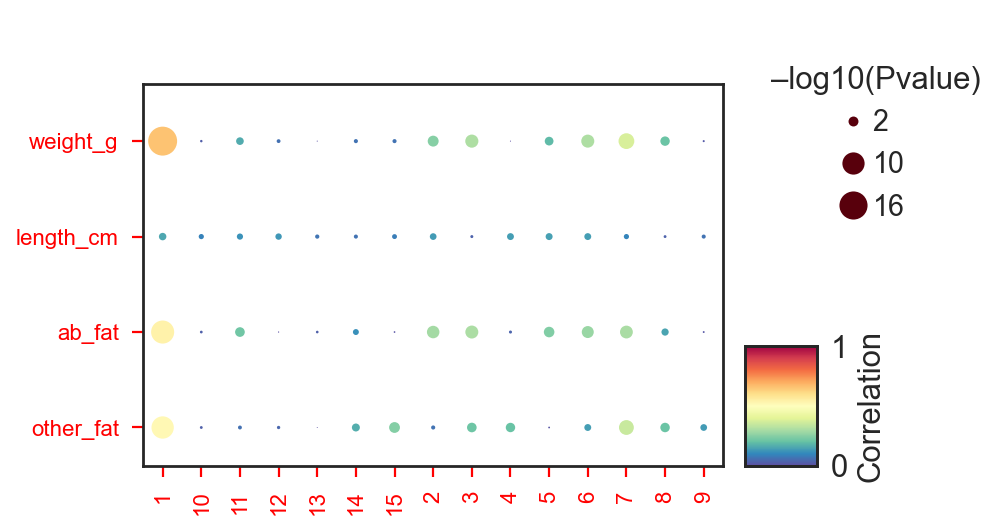

In [15]:
ax=gene_wgcna.plot_meta_correlation(cor_matrix)